Importing necessary libraries and loading the dataset.

In [182]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [183]:
df = pd.read_csv('dataset.csv')

Exploring the dataset

In [184]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [186]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Exploring and Handling Null Values in Categorical Columns

There are several approaches to handle missing values in categorical columns, I chose to fill the missing values using the mode as we cannot afford any data loss in the case of this dataset as it might result in inaccurate results and/or analysis.

In [218]:
#Handling Null Values in Gender Column
GenderValues = df['Gender'].value_counts()
GenderNullCount = df.Gender.isnull().sum()
GenderMode = df['Gender'].mode()[0]
print(f'{GenderValues}\nNumber of rows with null values in Gender column is: {GenderNullCount}, Most repeated value in the Gender column is: {GenderMode}')


Gender
Male      502
Female    112
Name: count, dtype: int64
Number of rows with null values in Gender column is: 0, Most repeated value in the Gender column is: Male


In [217]:
#Handling Null Values in Married Column
MarriedValues = df['Married'].value_counts()
MarriedNullCount = df.Married.isnull().sum()
MarriedMode = df['Married'].mode()[0]
print(f'{MarriedValues}\nNumber of rows with null values in Married column is: {MarriedNullCount}, Most repeated value in the Married column is: {MarriedMode}')

Married
Yes    401
No     213
Name: count, dtype: int64
Number of rows with null values  in Married column is: 0, Most repeated value in the Married column is: Yes


In [189]:
#Handling Null Values in Dependents Column
DepValues = df['Dependents'].value_counts()
DepNullCount = df.Dependents.isnull().sum()
DepMode = df['Dependents'].mode()[0]
print(f'{DepValues}\nNumber of rows with null values in Dependents column is: {DepNullCount}, Most repeated value in the Dependents column is: {DepMode}')

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Number of rows with null values in Dependents column is: 15, Most repeated value in the Dependents column is: 0


In [190]:
#Handling Null Values in Dependents Column
SelfEmpValues = df['Self_Employed'].value_counts()
SelfEmpNullCount = df.Self_Employed.isnull().sum()
SelfEmpMode = df['Self_Employed'].mode()[0]
print(f'{SelfEmpValues}\nNumber of rows with null values in Self_Employed column is: {SelfEmpNullCount}, Most repeated value in the Self_Employed column is: {SelfEmpMode}')

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Number of rows with null values in Self_Employed column is: 32, Most repeated value in the Self_Employed column is: No


In [191]:
#Filling Null Values in the Columns mentioned above
df = df.fillna({'Gender':GenderMode,'Married':MarriedMode,'Dependents':0,'Self_Employed':SelfEmpMode})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Exploring and Handling Missing Values in Numerical Columns

Mean is more sensitive to outliers, meaning if the values are not consistent and there are very few large (or small) amounts, it can lead to inaccurate representation and values, so using Median in this case is better as it is not as sensitive to Outliers.

In [192]:
#LoanAmount Column
MaxAmount = df['LoanAmount'].max()
MinAmount = df['LoanAmount'].min()
MeanLoanAmount = df['LoanAmount'].mean(axis=0)
MedianLoanAmount = df['LoanAmount'].median(axis=0)
print(f'Maximum Loan Amount: {MaxAmount}, Minimum Amount: {MinAmount}, Mean of this column: {MeanLoanAmount}, Median of this column: {MedianLoanAmount}')

Maximum Loan Amount: 700.0, Minimum Amount: 9.0, Mean of this column: 146.41216216216216, Median of this column: 128.0


In [221]:
MeanLoanAmountT = df['Loan_Amount_Term'].mean(axis=0)
MedianLoanAmountT = df['Loan_Amount_Term'].median(axis=0)
ModeLoanAmountT = df['Loan_Amount_Term'].mode()[0]
print(f'Mean of this column: {MeanLoanAmountT}, Median of this column: {MedianLoanAmountT}, Mode of this column: {ModeLoanAmountT}')

Mean of this column: 35.03257328990228, Median of this column: 36.0, Mode of this column: 36


In [223]:
CredHistValues = df['Credit_History'].value_counts()
CredHistMode = df['Credit_History'].mode()[0]
print(f"{CredHistValues}\nMost Repeated value in this Column: {CredHistMode}")

Credit_History
1    525
0     89
Name: count, dtype: int64
Most Repeated value in this Column: 1


As one value is more dominant than the other, filling the missing values with that value is the safest option.

In [195]:
#Filling Missing Values with the methods mentioned above
df = df.fillna({'LoanAmount':MedianLoanAmount,'Loan_Amount_Term':MedianLoanAmountT,'Credit_History':CredHistMode})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Preforming Basic Transformation before Analysis

In [196]:
#Casting columns into their appropriate Datatypes
df['Credit_History']=df['Credit_History'].astype(int)
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

In [197]:
#Transforming the Loan Amount Term Column (Getting rid of the extra 0 in the end)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str)
#Creating a function to eliminate the last element in each value in the column (in this case, 0)
def removeLastElem(value):
    if len(value) == 3:
        return value[:-1]
    else:
        return value
#Applying the function to the column
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(removeLastElem)

#Casting the column back into integer datatype
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

#Creating a new dataframe for future correlation analysis
dfEncoded = df.copy()

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int32  
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(2), object(8)
memory usage: 57.7+ KB


Feature Engineering

In [198]:
#Creating a new column 'TotalIncome' which is the result of adding Applicant Income and Co-Applicant Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#Creating a new column 'LoanInfo' which consists of the Loan Amount and the Loan Amount Term in the form of 'LoanAmount/Loan_Amount_Term(M)
df['LoanInfo'] = df['LoanAmount'].astype(str) + '/' + df['Loan_Amount_Term'].astype(str) + 'M'



In [199]:
#Ordering Columns of the new transformed Dataframe
orderedCols = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","TotalIncome","LoanAmount","Loan_Amount_Term","LoanInfo","Credit_History","Property_Area","Loan_Status"]
df = df[orderedCols]
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,Loan_Amount_Term,LoanInfo,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,5849.0,128.0,36,128.0/36M,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,6091.0,128.0,36,128.0/36M,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,3000.0,66.0,36,66.0/36M,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,4941.0,120.0,36,120.0/36M,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,6000.0,141.0,36,141.0/36M,1,Urban,Y


Exploratory Data Analysis

In [200]:
#Total Number of Applications

NoOfApps = df.Loan_Status.count()
print(f"Total Number of Loan Applications Submitted: {NoOfApps} Applications")

Total Number of Loan Applications Submitted: 614 Applications


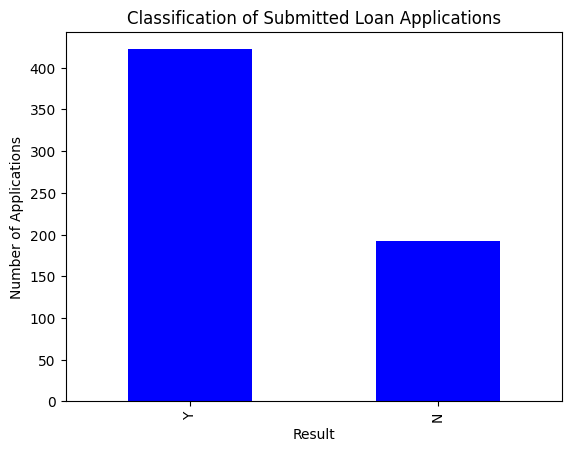

In [201]:
counts = df['Loan_Status'].value_counts()

counts.plot(kind="bar", x="Response", y="counts", color="blue")
plt.title("Classification of Submitted Loan Applications")
plt.xlabel("Result")
plt.ylabel("Number of Applications")
plt.show()

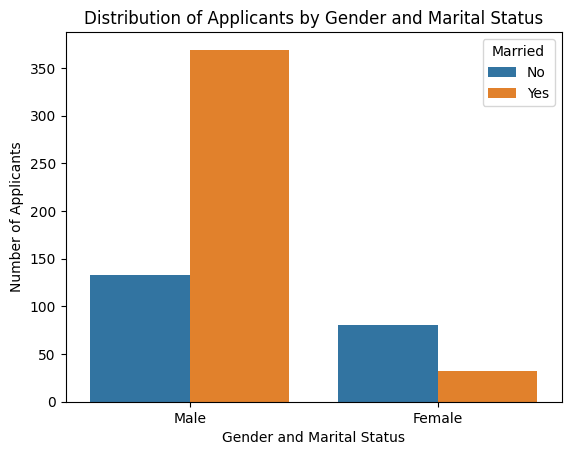

In [202]:
sns.countplot(x='Gender',hue='Married', data=df)

plt.title("Distribution of Applicants by Gender and Marital Status")
plt.xlabel("Gender and Marital Status")
plt.ylabel("Number of Applicants")
plt.show()

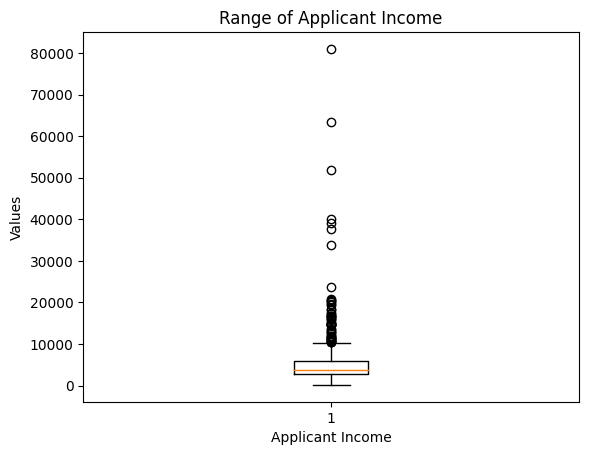

In [203]:
applicantIncome = df['ApplicantIncome']
plt.boxplot(applicantIncome)
plt.title('Range of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Values')
plt.show()

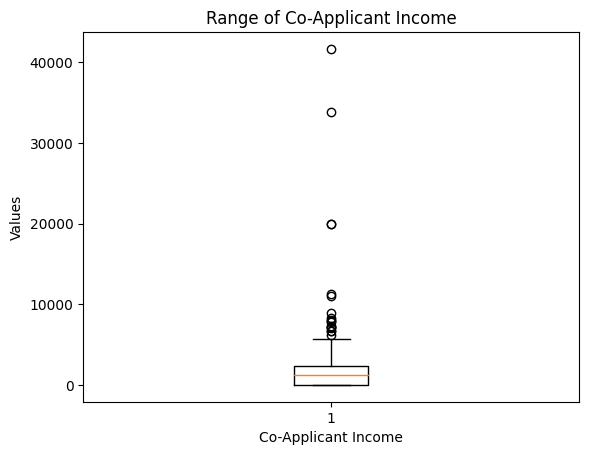

In [204]:
coApplicantIncome = df['CoapplicantIncome']
plt.boxplot(coApplicantIncome)
plt.title('Range of Co-Applicant Income')
plt.xlabel('Co-Applicant Income')
plt.ylabel('Values')
plt.show()

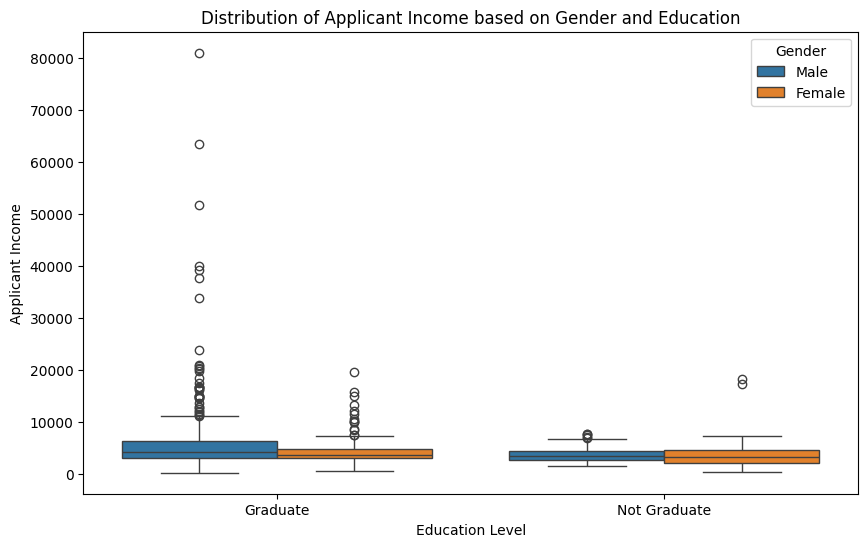

In [205]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='ApplicantIncome', hue='Gender', data=df)
plt.title('Distribution of Applicant Income based on Gender and Education')
plt.xlabel('Education Level')
plt.ylabel('Applicant Income')
plt.legend(title='Gender')
plt.show()

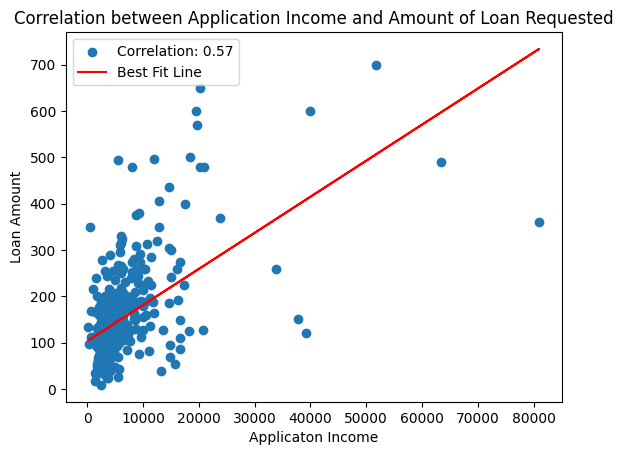

In [206]:
#Finding the correlation between Loan Amount and Application Income
correlation_coefficient = df['ApplicantIncome'].corr(df['LoanAmount'])

coefficients = np.polyfit(df['ApplicantIncome'], df['LoanAmount'], 1)
poly_function = np.poly1d(coefficients)

plt.scatter(df['ApplicantIncome'], df['LoanAmount'], label=f'Correlation: {correlation_coefficient:.2f}')
plt.plot(df['ApplicantIncome'], poly_function(df['ApplicantIncome']), color='red', label='Best Fit Line')
plt.title('Correlation between Application Income and Amount of Loan Requested')
plt.xlabel('Applicaton Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()


As shown, there's no correlation between the applicant income and the Loan Amount Requested

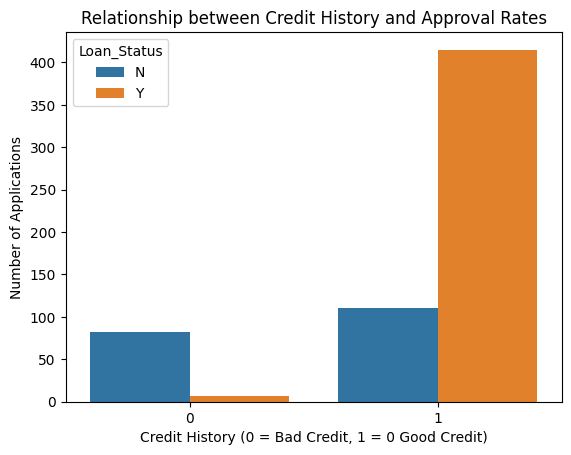

Loan_Status       N    Y
Credit_History          
0                82    7
1               110  415
Percentage of Loan Applicants with Good Credit History Approved for Loans = 79.05 %


In [207]:
sns.countplot(x='Credit_History',hue='Loan_Status', data=df)

plt.title("Relationship between Credit History and Approval Rates")
plt.xlabel("Credit History (0 = Bad Credit, 1 = 0 Good Credit)")
plt.ylabel("Number of Applications")
plt.show()
info = pd.crosstab(df['Credit_History'],df['Loan_Status'])
print(info)
percentage = (415/525) * 100
print(f"Percentage of Loan Applicants with Good Credit History Approved for Loans = {percentage:.2f} %")

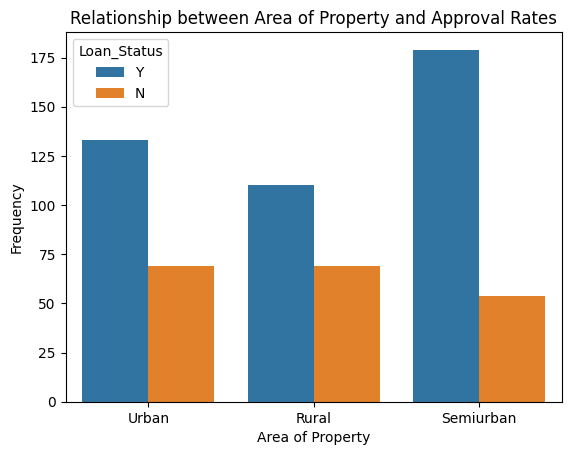

In [208]:
sns.countplot(x='Property_Area',hue='Loan_Status', data=df)

plt.title("Relationship between Area of Property and Approval Rates")
plt.xlabel("Area of Property")
plt.ylabel("Frequency")
plt.show()

You're more likely to get approved for a loan request if you live in a Semi Urban Property as you can afford to pay it off and do not pose a risk for the bank.

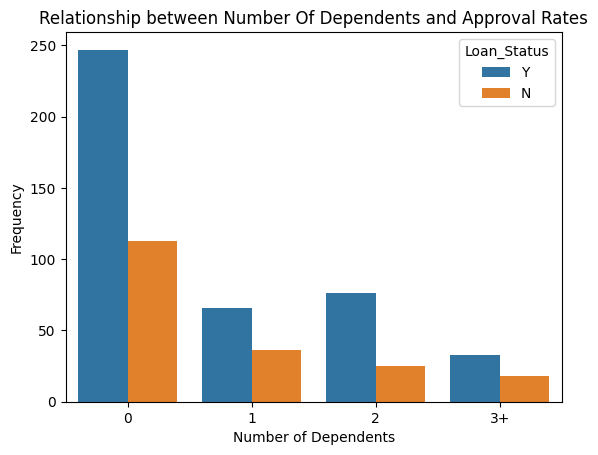

In [209]:
sns.countplot(x='Dependents',hue='Loan_Status', data=df)

plt.title("Relationship between Number Of Dependents and Approval Rates")
plt.xlabel("Number of Dependents")
plt.ylabel("Frequency")
plt.show()

As the number of dependents decrease, you're more likely to get approved for your loan request.

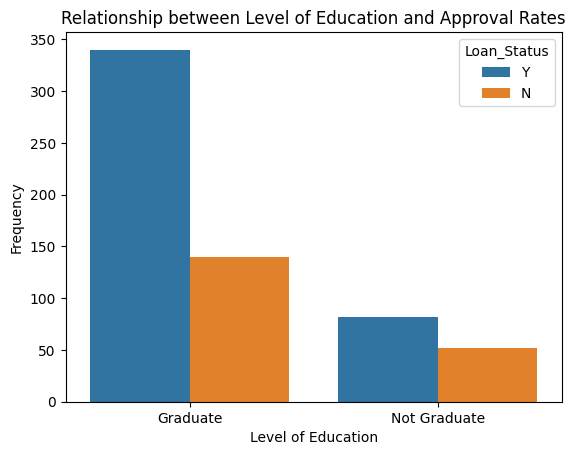

In [210]:
sns.countplot(x='Education',hue='Loan_Status', data=df)

plt.title("Relationship between Level of Education and Approval Rates")
plt.xlabel("Level of Education")
plt.ylabel("Frequency")
plt.show()

Graduates are more likely to have their application approved as a graduate on average has more income than a not graduate and is therefore able to pay off the loan.

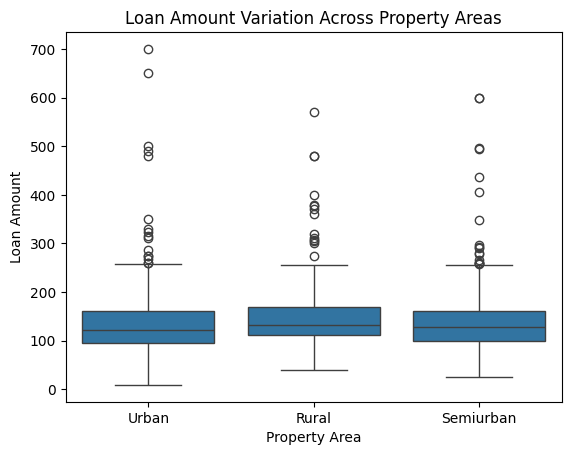

In [224]:
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)

plt.title('Loan Amount Variation Across Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')

plt.show()


Correlation Analysis

In [212]:
#A copy of the original dataframe before feature engineering (extra features are not needed)
dfEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int32  
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(2), object(8)
memory usage: 57.7+ KB


In [213]:
# Created a new dataframe that operates on the 'dfEncoded' that is copied from the original df after handling missing values and applying data transformation
#Numerically encoded some columns and one-hot encoded the other into a separate dataframe
corrAnalysisOneHot = pd.get_dummies(dfEncoded['Property_Area'],dtype=int)
corrAnalysisNumerical = dfEncoded.replace({'Gender':{'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Dependents':{'0':0,'1':1,'2':2,'3+':3.5},'Education':{'Not Graduate':0,'Graduate':1},'Self_Employed':{'No':0,'Yes':1},'Loan_Status':{'N':0,'Y':1}}).drop(columns=['Loan_ID','Property_Area'])
corrAnalysis = pd.concat([corrAnalysisNumerical,corrAnalysisOneHot],axis=1)
orderedCols = ["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Rural",'Semiurban','Urban',"Loan_Status"]
corrAnalysis = corrAnalysis[orderedCols]
corrAnalysis.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,Loan_Status
0,0,0,0.0,1,0,5849.0,0.0,128.0,36,1,0,0,1,1
1,0,1,1.0,1,0,4583.0,1508.0,128.0,36,1,1,0,0,0
2,0,1,0.0,1,1,3000.0,0.0,66.0,36,1,0,0,1,1
3,0,1,0.0,0,0,2583.0,2358.0,120.0,36,1,0,0,1,1
4,0,0,0.0,1,0,6000.0,0.0,141.0,36,1,0,0,1,1


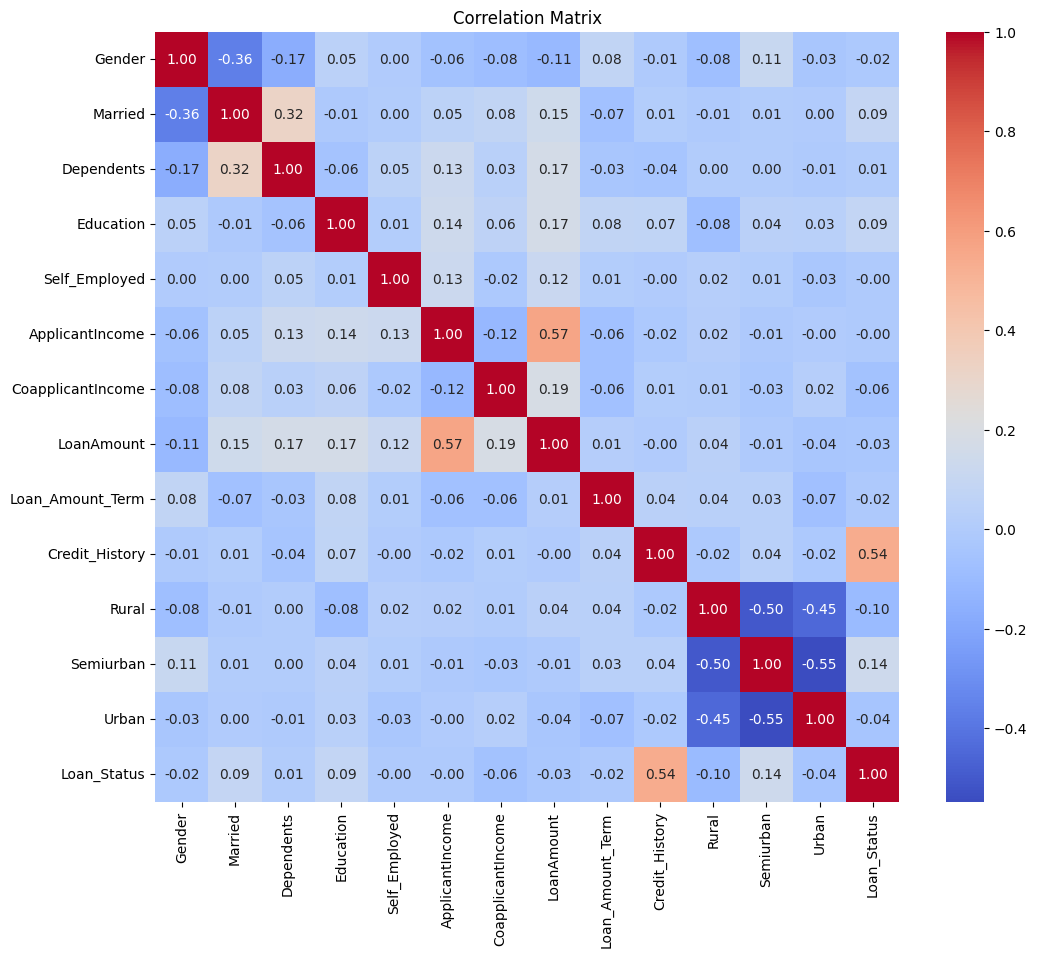

In [214]:
#Correlation Analysis by creating a heatmap to show correlation between each column and other columns inside the dataset

correlationMat = corrAnalysis.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlationMat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [215]:
#Created a Classification Model to Predict outcomes of future Loan Applicants based on given features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = corrAnalysis.drop('Loan_Status', axis=1)  
y = corrAnalysis['Loan_Status'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Metrics to evaluate the Model's performance
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.79

Confusion Matrix:
[[18 25]
 [ 1 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

